### Task 1

Appliances Power Consumption Scrapper.
You have to scrape all power consumption data from Website and return all data in csv format.

In [3]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


### Read Data From URL

In [33]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.daftlogic.com/information-appliance-power-consumption.htm"
result = requests.get(url).text

doc = BeautifulSoup(result, "html.parser")

title = doc.find("title").string
table = doc.find("table",id="tblApp")

th_tags = table.find_all("th")
column_names = []

for th in th_tags:
    column_names.append(th.string)

data = pd.read_html(str(table))[0]
data

,Appliance,Minimum,Maximum,Standby,Other Name(s),References,Notes
0,100W light bulb (Incandescent),100W,100W,0W,NaN,[1],NaN
1,22 Inch LED TV,17W,17W,0.5W,NaN,NaN,NaN
2,"25"" colour TV",150W,150W,NaN,NaN,NaN,NaN
3,"3"" belt sander",1000W,1000W,NaN,NaN,NaN,NaN
4,32 Inch LED TV,20W,60W,1W,NaN,NaN,NaN
...,...,...,...,...,...,...,...
150,WiFi Booster,1W,2W,NaN,"WiFi Repeater,WiFi Extender,Range Extender",NaN,NaN
151,WiFi Router,4W,10W,4W,Router,NaN,NaN
152,Window Air Conditioner,500W,1500W,NaN,Window AC,NaN,NaN
153,Wine cooler (18 bottles),83W,83W,0W,NaN,[1],NaN


### Save Data to CSV

In [34]:
data.to_csv("Power Consumption.csv")

### Task2: Basic data manipulation and analysis using Pandas with a provided dataset

Use the Iris flower dataset to answer the following questions:
- What is the average sepal length for each species of iris?
- What is the correlation between sepal length and petal length?
- Which species of iris has the largest petals?

### Read Iris CSV

In [35]:
import pandas as pd
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### average sepal length for each species of iris

In [53]:
grouped = df.groupby("Species")
# show the grouped indices/indexes
grouped.indices
# get a single group details
grouped.get_group("Iris-virginica")
# average of all the columns
grouped.mean()
# average of sepal length only
grouped.SepalLengthCm.mean()

Species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLengthCm, dtype: float64

### correlation between sepal length and petal length

Correlation: 0.8717541573048718


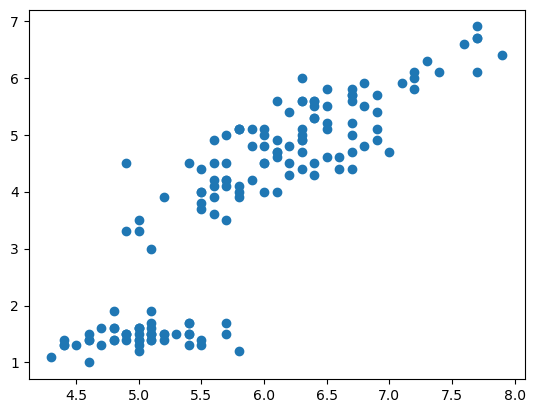

In [61]:
# correlation between sepal length and petal length
import matplotlib.pyplot as plt
print("Correlation: {}".format(df['SepalLengthCm'].corr(df['PetalLengthCm'])))
plt.scatter(df['SepalLengthCm'],df['PetalLengthCm'])

### Specie with largest petals

In [89]:
# species of iris has the largest petals
df['PetalLengthCm'].max()
max_id = df['PetalLengthCm'].idxmax()
df.iloc[max_id]

Id                          119
SepalLengthCm               7.7
SepalWidthCm                2.6
PetalLengthCm               6.9
PetalWidthCm                2.3
Species          Iris-virginica
Name: 118, dtype: object